# This section presents the implemention and the analysis of the Ensemble Methods： Random forest algorithm. 

Random Forest is a typical representative of ensemble learning methods. Random forest belongs to the bagging (bootstrapping aggregation) category of ensemble techniques. Specifically, it improves the overall prediction performance and robustness by combining the prediction results of multiple decision trees.

## In the first part:
1. we import the necessary libraries and datasets, the Wine dataset. This dataset contains chemical composition data of different types of wines, as well as their classification labels.
2. we display the first few rows of the dataset and descriptive statistics to understand the basic structure of the dataset. 
3. we visualize the distribution of the target variable by plotting the distribution of the species

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Class  
0           

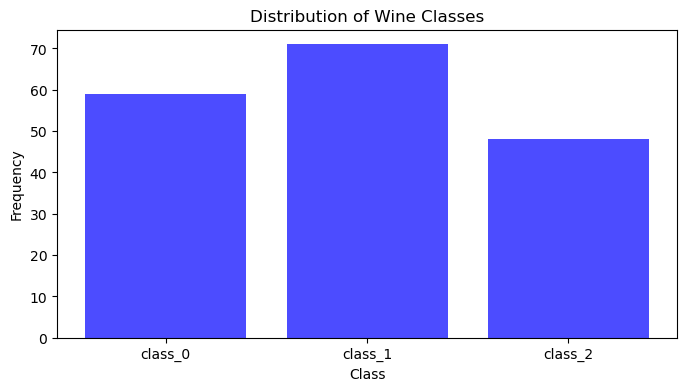

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['Class'] = wine.target

# Show the first few rows of the dataset and its descriptive statistics 
print(data.head())
print(data.describe())

# Plotting the distribution of wine classes
plt.figure(figsize=(8, 4))
plt.hist(data['Class'], bins=np.arange(4) - 0.5, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Distribution of Wine Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1, 2], labels=wine.target_names)
plt.show()



## In the second part:

1. we partition the dataset into the features and the target label, the Class.
2. we split the dataset into the training set and the test set.
3. we train a random forest model on the training set.
4. we show the importance of each feature to see which features have the greatest impact on the model’s prediction results.


In [15]:
# Import libraries for Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Select features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Display the importance of each feature
print("Feature importances:", model.feature_importances_)



Feature importances: [0.11239774 0.03570276 0.02128206 0.03242488 0.0368407  0.02927859
 0.20229342 0.01351525 0.02356092 0.17120218 0.07089132 0.11156432
 0.13904587]


## In the third part:
1. we use the trained model to make predictions on the test set.
2. we evaluate model performance by showing the whole classification report including accuracy, recall, precison, and F-1 score.
3. we use the confusion matrix to show how the model performs on three different categories. Here, we can observe that all the test data are classified into the correct class.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



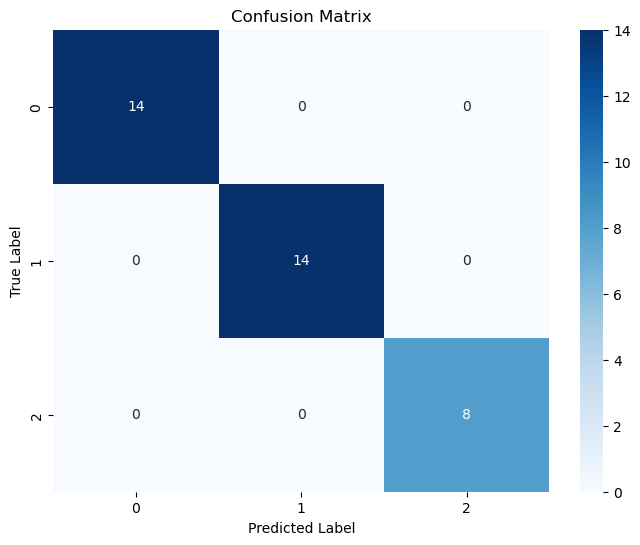

In [16]:
# Import libraries for model evaluation
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



## Analysis part:
1. we further analyze the different implementation. For example, we control the parameter "criterion" to choose different methods such as "gini impurity" and "entropy". Besdies, we also control the "n_estimators" to change the number of trees.
2. we train the model.
3. we use the confusion matrix and classification report to evaluate the model's performance. 
4. we can observe  when the number of trees is 10, the accuracy drops to 94%. It indicates that 10 trees are not enough for make the best classification. So, we should increase the number of trees. However, a larger n_estimators value will increase the training time. In practice, how to set these hyperparameters is improtant to balance the training performance and the time.

Feature importances: [0.0900233  0.01603244 0.00992618 0.01447571 0.038854   0.09307105
 0.3259008  0.03874769 0.00260667 0.11164887 0.04579025 0.14717492
 0.06574812]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.93      0.93      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



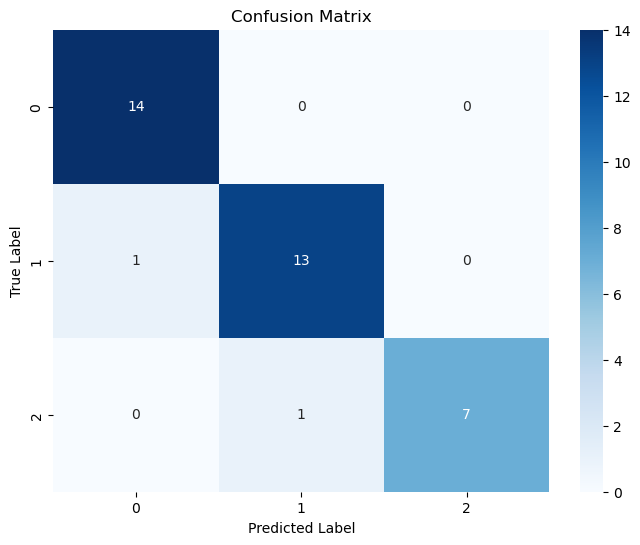

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = data.drop('Class', axis=1)
y = data['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier model, here we change the tree to 10 and employ the information gain
model = RandomForestClassifier(n_estimators=10,criterion="entropy", random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

print("Feature importances:", model.feature_importances_)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()